In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# 1.Importing Libraries


In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler, TensorBoard
import tensorflow as tf

# 2.Priprema podataka


In [2]:
data_dir = r'C:\Users\laxim\Desktop\Neuronske_mreze\Data'


img_height, img_width = 150, 150
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,  
    shear_range=0.2,       
    zoom_range=0.2,        
    rotation_range=20,    
    width_shift_range=0.2, 
    height_shift_range=0.2,
    horizontal_flip=True   
)

validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = validation_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 3457 images belonging to 5 classes.
Found 860 images belonging to 5 classes.


# 3.Definiranje i Treniranje Modela : Iteracija 1



In [3]:
model = models.Sequential([
    layers.Conv2D(16, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.Dense(5, activation='softmax')
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=10
)

c:\Users\laxim\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


c:\Users\laxim\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


108/108 ━━━━━━━━━━━━━━━━━━━━ 12s 98ms/step - accuracy: 0.3031 - loss: 3.0152 - val_accuracy: 0.4603 - val_loss: 1.3751
Epoch 2/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 325us/step - accuracy: 0.4688 - loss: 1.3275 - val_accuracy: 0.5357 - val_loss: 1.5095
Epoch 3/10


c:\Users\laxim\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


108/108 ━━━━━━━━━━━━━━━━━━━━ 11s 98ms/step - accuracy: 0.4894 - loss: 1.2511 - val_accuracy: 0.5096 - val_loss: 1.1966
Epoch 4/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 256us/step - accuracy: 0.3438 - loss: 1.3747 - val_accuracy: 0.5357 - val_loss: 1.1734
Epoch 5/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 11s 97ms/step - accuracy: 0.5194 - loss: 1.1731 - val_accuracy: 0.5204 - val_loss: 1.3447
Epoch 6/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 284us/step - accuracy: 1.0000 - loss: 0.5262 - val_accuracy: 0.3571 - val_loss: 1.5640
Epoch 7/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 11s 98ms/step - accuracy: 0.5340 - loss: 1.1628 - val_accuracy: 0.5337 - val_loss: 1.2237
Epoch 8/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 261us/step - accuracy: 0.5938 - loss: 1.2330 - val_accuracy: 0.6786 - val_loss: 0.9763
Epoch 9/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 11s 97ms/step - accuracy: 0.5457 - loss: 1.1238 - val_accuracy: 0.5733 - val_loss: 1.1733
Epoch 10/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 253us/step - accuracy: 0.6250 - loss: 0.9355 - val_accura

# 4.Iteracija 2 

In [4]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(5, activation='softmax')
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=20
)

Epoch 1/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 16s 142ms/step - accuracy: 0.3134 - loss: 2.4898 - val_accuracy: 0.3978 - val_loss: 1.4397
Epoch 2/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 271us/step - accuracy: 0.4688 - loss: 1.3669 - val_accuracy: 0.5000 - val_loss: 1.3120
Epoch 3/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 16s 141ms/step - accuracy: 0.4805 - loss: 1.2392 - val_accuracy: 0.5661 - val_loss: 1.1338
Epoch 4/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 193us/step - accuracy: 0.5312 - loss: 1.2402 - val_accuracy: 0.5357 - val_loss: 1.3220
Epoch 5/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 16s 143ms/step - accuracy: 0.5793 - loss: 1.0891 - val_accuracy: 0.5913 - val_loss: 1.0264
Epoch 6/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 233us/step - accuracy: 0.5625 - loss: 1.0757 - val_accuracy: 0.5000 - val_loss: 1.0689
Epoch 7/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 16s 147ms/step - accuracy: 0.5910 - loss: 1.0404 - val_accuracy: 0.6058 - val_loss: 1.0712
Epoch 8/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 238us/step - accuracy: 0.6562 - loss: 1.066

# 5.Iteracija 3

In [5]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(5, activation='softmax')
])

model.compile(
    optimizer=Adam(learning_rate=0.0005),  
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history_final = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=50  
)

Epoch 1/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 19s 162ms/step - accuracy: 0.3504 - loss: 1.4664 - val_accuracy: 0.4928 - val_loss: 1.1426
Epoch 2/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step - accuracy: 0.5625 - loss: 0.9931 - val_accuracy: 0.6429 - val_loss: 0.9058
Epoch 3/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 17s 155ms/step - accuracy: 0.4979 - loss: 1.1776 - val_accuracy: 0.6118 - val_loss: 1.0128
Epoch 4/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 249us/step - accuracy: 0.6562 - loss: 1.2295 - val_accuracy: 0.5714 - val_loss: 0.8670
Epoch 5/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 17s 151ms/step - accuracy: 0.5858 - loss: 1.0268 - val_accuracy: 0.5541 - val_loss: 1.0898
Epoch 6/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 253us/step - accuracy: 0.5625 - loss: 0.9916 - val_accuracy: 0.6429 - val_loss: 0.9849
Epoch 7/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 17s 151ms/step - accuracy: 0.5821 - loss: 1.0226 - val_accuracy: 0.6334 - val_loss: 0.9177
Epoch 8/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 238us/step - accuracy: 0.5312 - loss: 1.186

# 6.Konačna iteracija

In [6]:
from tensorflow.keras import models, layers
from tensorflow.keras.optimizers import Adam

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),  
    layers.Dense(5, activation='softmax')  
])

model.compile(
    optimizer=Adam(learning_rate=0.0003),  
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history_final = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=100 
)

loss, accuracy = model.evaluate(validation_generator)
print(f'Točnost konačnog modela na testnom skupu: {accuracy * 100:.2f}%')


Epoch 1/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 18s 155ms/step - accuracy: 0.3264 - loss: 1.4905 - val_accuracy: 0.5192 - val_loss: 1.1807
Epoch 2/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step - accuracy: 0.5625 - loss: 1.0913 - val_accuracy: 0.3214 - val_loss: 1.4992
Epoch 3/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 17s 152ms/step - accuracy: 0.5037 - loss: 1.1870 - val_accuracy: 0.5793 - val_loss: 1.0560
Epoch 4/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 250us/step - accuracy: 0.5312 - loss: 1.1886 - val_accuracy: 0.5714 - val_loss: 0.9405
Epoch 5/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 17s 153ms/step - accuracy: 0.5452 - loss: 1.1185 - val_accuracy: 0.5938 - val_loss: 1.0347
Epoch 6/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 259us/step - accuracy: 0.6875 - loss: 1.0743 - val_accuracy: 0.6429 - val_loss: 1.0806
Epoch 7/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 17s 152ms/step - accuracy: 0.5955 - loss: 1.0281 - val_accuracy: 0.6142 - val_loss: 0.9861
Epoch 8/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 267us/step - accuracy: 0.7188 - los

# 7.Konačna vizualizacija

27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.7444 - loss: 0.7573
Točnost modela na testnom skupu: 76.86%


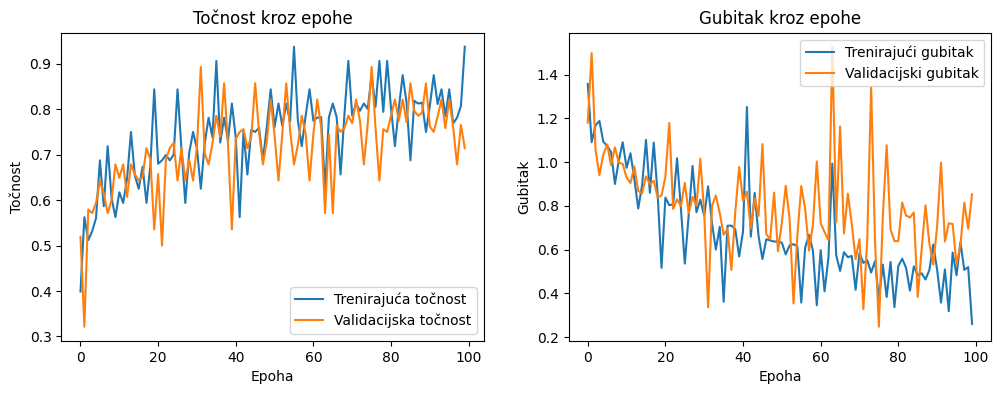

In [7]:
loss, accuracy = model.evaluate(validation_generator)
print(f'Točnost modela na testnom skupu: {accuracy * 100:.2f}%')

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history_final.history['accuracy'], label='Trenirajuća točnost')
plt.plot(history_final.history['val_accuracy'], label='Validacijska točnost')
plt.xlabel('Epoha')
plt.ylabel('Točnost')
plt.legend(loc='lower right')
plt.title('Točnost kroz epohe')

plt.subplot(1, 2, 2)
plt.plot(history_final.history['loss'], label='Trenirajući gubitak')
plt.plot(history_final.history['val_loss'], label='Validacijski gubitak')
plt.xlabel('Epoha')
plt.ylabel('Gubitak')
plt.legend(loc='upper right')
plt.title('Gubitak kroz epohe')

plt.show()

# 8.Spremanje Modela

In [8]:
model.save('flower_classification_final_model_2.keras')